## Predicting Heart Failure and Heart Disease

In [48]:
# Packages needed for modeling and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix, recall_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from math import sqrt
import re
import os
import string
import nltk 
from nltk.corpus import stopwords
import category_encoders as cat_encoder
import math

## DataSet 

In [49]:
# Importing Dataset to Dataframe
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [50]:
# Top 5 rows and column headers
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [51]:
# Rows and Columns of dataset
df.shape

(253680, 22)

In [52]:
# Finding Nulls
df.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
# Data Types of columns
df.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [6]:
# Statistics of numercal data
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


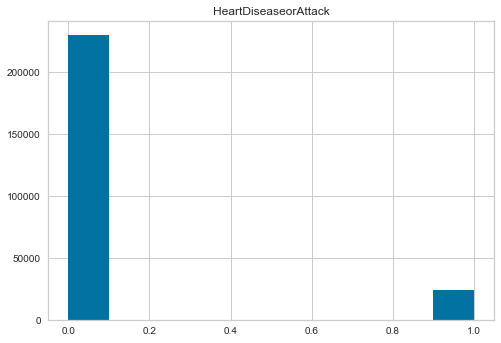

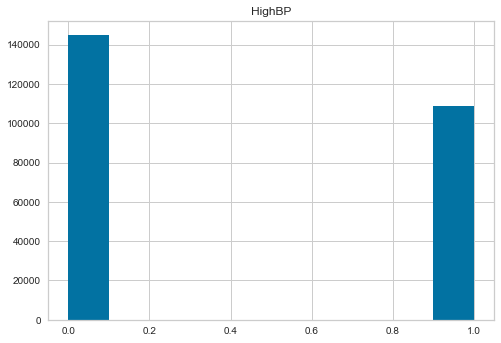

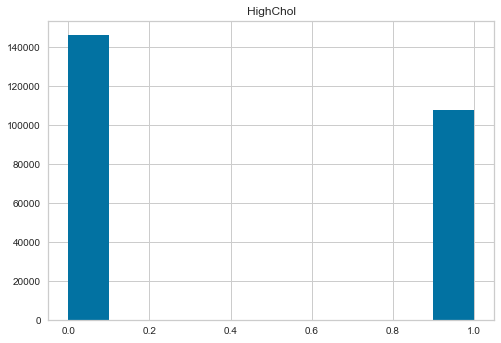

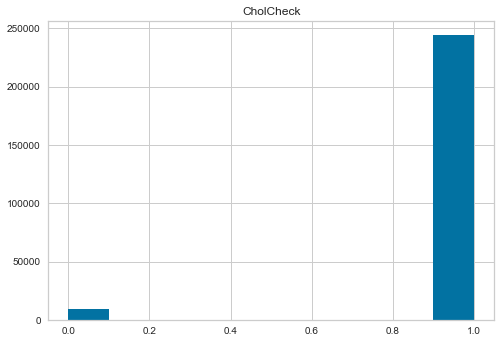

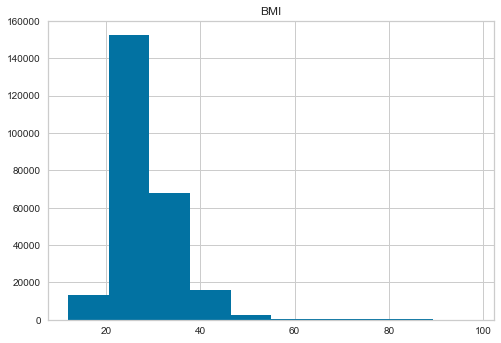

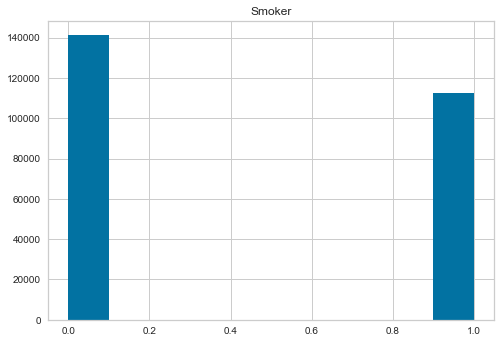

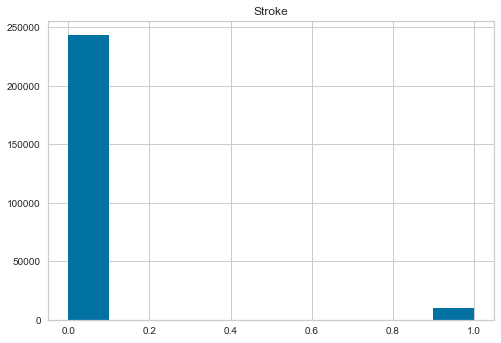

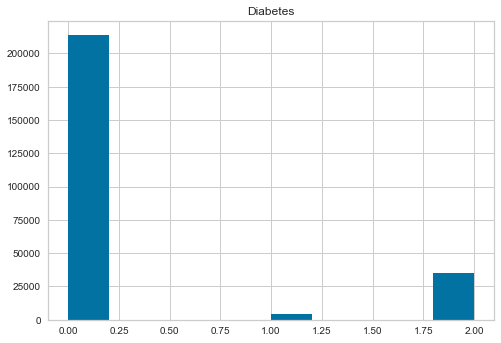

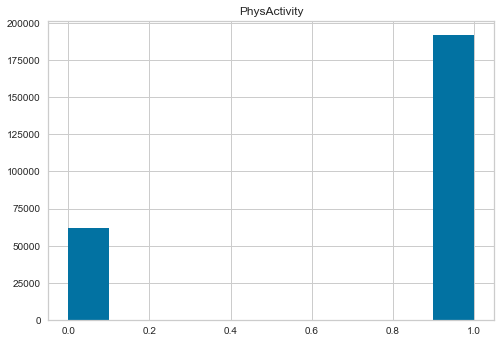

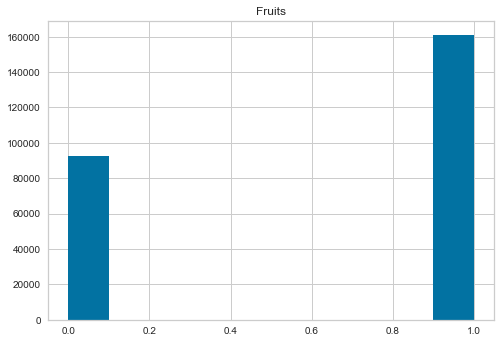

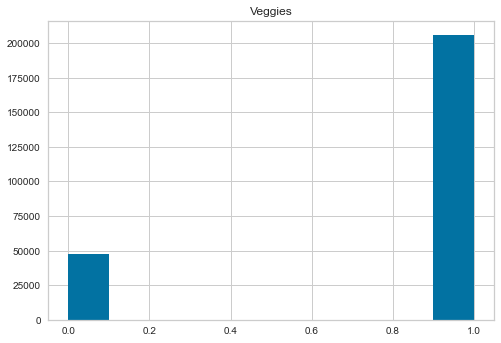

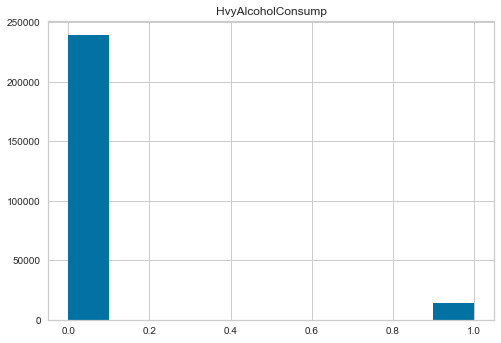

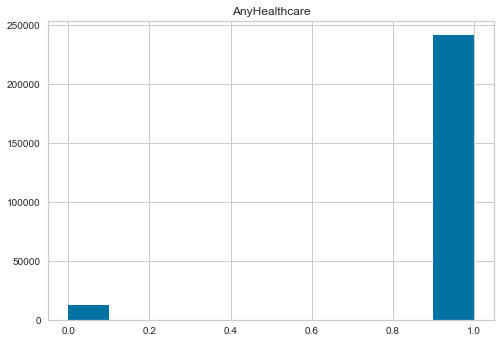

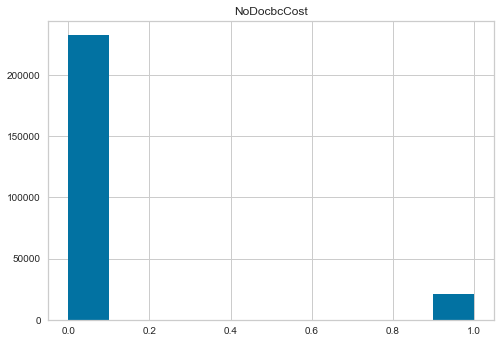

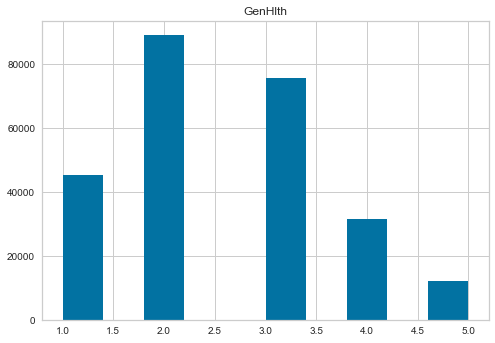

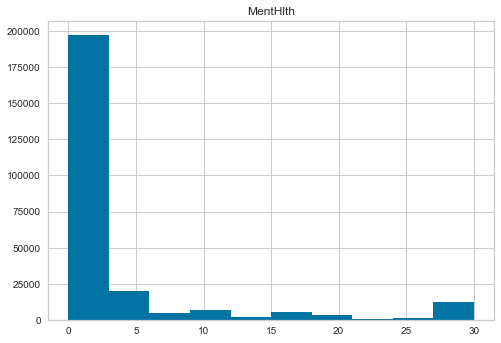

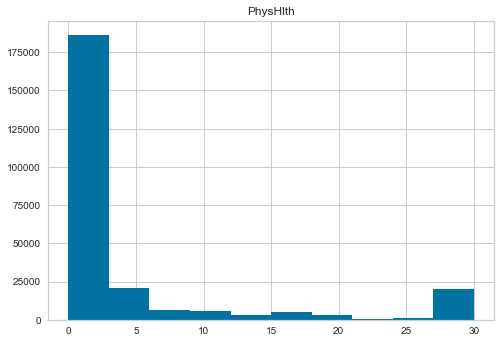

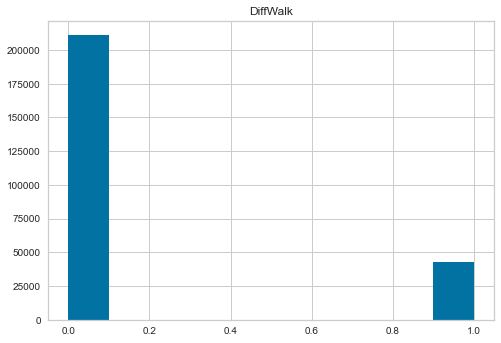

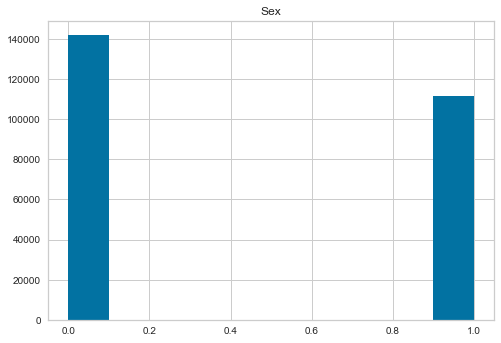

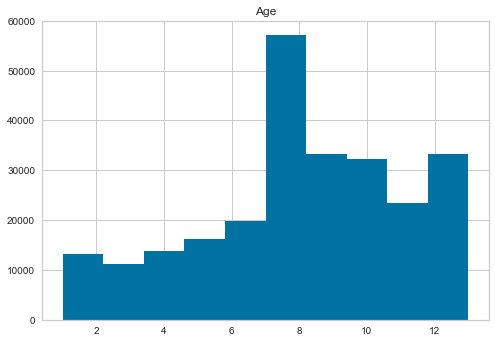

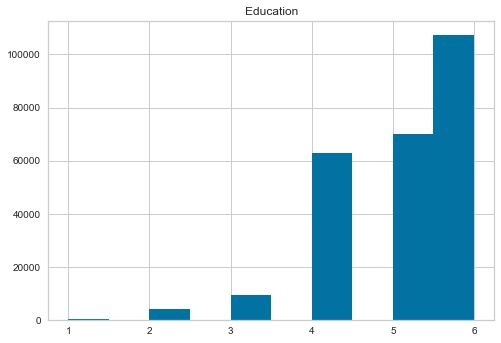

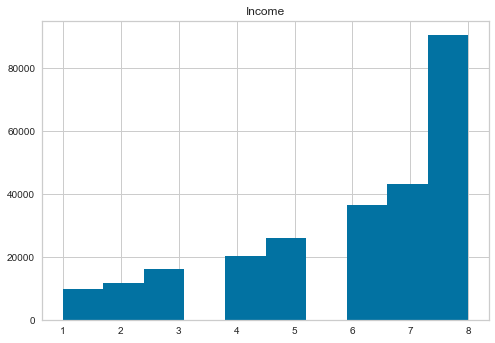

In [8]:
# Plotting Multiple Histograms to see data relation
for a in df.columns:
    df[a].hist()
    plt.title(a)
    plt.show()

## Preparing The Data 

In [19]:
X = df.drop(columns='HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Train / Test 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=0)

In [21]:
import warnings
warnings.filterwarnings("ignore")

## Logistic Regression

In [22]:
model = LogisticRegression()

In [23]:
#Fitting the model
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
# Measuring Accuracy Score of the Model
accuracy_score(y_test, y_pred)

0.9081520025228634

In [29]:
print(classification_report(y_test,y_pred))
cmatrix = confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45964
         1.0       0.55      0.13      0.21      4772

    accuracy                           0.91     50736
   macro avg       0.73      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



In [31]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[45473,   491],
       [ 4169,   603]], dtype=int64)

## Random Forest Classifier 

In [32]:
clf = RandomForestClassifier(n_estimators = 100) 

In [33]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred = clf.predict(X_test)

In [38]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9030471460107222


In [37]:
print(classification_report(y_test,y_pred))
cmatrix = confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     45964
         1.0       0.44      0.12      0.19      4772

    accuracy                           0.90     50736
   macro avg       0.68      0.55      0.57     50736
weighted avg       0.87      0.90      0.88     50736



## Decision Tree Classifier 

In [39]:
clf = DecisionTreeClassifier(random_state=0)

# fitting the model on the train data
clf.fit(X_train, y_train)

# predicting values on test data
y_pred = clf.predict(X_test)

In [40]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8505991800693787


In [42]:
print(classification_report(y_test,y_pred))
cmatrix = confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     45964
         1.0       0.25      0.28      0.26      4772

    accuracy                           0.85     50736
   macro avg       0.58      0.60      0.59     50736
weighted avg       0.86      0.85      0.86     50736



## Naive Bayes 

In [46]:
gnb = GaussianNB()

# fitting model to Naive Bayes
gnb.fit(X_train, y_train)

# predicting values on test data
y_pred = Gnb.predict(X_test)

In [47]:
print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test, y_pred))

Naive Bayes Classifier Accuracy:  0.8206993062125513
